# Import dependencies

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
from scipy.optimize import curve_fit


%matplotlib inline

# Functions

In [2]:
def fit_data(totale_casi, data, func):
    xdata = np.arange(len(totale_casi))
    popt, pcov = curve_fit(func, xdata, totale_casi)
    
    print("Parameters: {0}".format(popt))
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    plt.plot(data, totale_casi, label="Totale casi")
    plt.plot(data, func(xdata, *popt), "--", label="Curve fit")

    plt.legend(loc="upper left")
    plt.show()
    
    return xdata, popt, pcov

# Load data

In [3]:
dati_andamento_nazionale_fpath = "../../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(dati_andamento_nazionale_fpath, sep=",")

In [4]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
32,2020-03-27T17:00:00,ITA,26029,3732,29761,36653,66414,4401,5959,10950,9134,86498,394079,NaN,NaN
33,2020-03-28T17:00:00,ITA,26676,3856,30532,39533,70065,3651,5974,12384,10023,92472,429526,NaN,NaN
34,2020-03-29T17:00:00,ITA,27386,3906,31292,42588,73880,3815,5217,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30T17:00:00,ITA,27795,3981,31776,43752,75528,1648,4050,14620,11591,101739,477359,NaN,NaN
36,2020-03-31T17:00:00,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN


## Coverti data: string to datetime object

In [5]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime
                                            .strptime(x, "%Y-%m-%dT%H:%M:%S")
                                            .replace(hour=0))

In [6]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,5959,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,5974,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,5217,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,4050,14620,11591,101739,477359,NaN,NaN
36,2020-03-31,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN


## Seleziona data - ENG: Select Date 

In [7]:
oggi = datetime.strptime("2020-03-31", "%Y-%m-%d")
print(oggi)

2020-03-31 00:00:00


Dal momento che ci sono state variazioni dall'inizio dell'epidemia, selezioniamo una finestra temporale di 21 giorni.  
**oggi - 21 giorni**  

ENG: Since there have been several fluctuations since the beginning of the epidemic, we limit the analysis to a 21 days window  
**today - 21 days**

In [8]:
data_iniziale = oggi - timedelta(days=21)

In [9]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,5959,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,5974,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,5217,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,4050,14620,11591,101739,477359,NaN,NaN
36,2020-03-31,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN


In [10]:
df = df[(df["data"] <= oggi) & (df["data"] >= data_iniziale)]

In [11]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
32,2020-03-27,ITA,26029,3732,29761,36653,66414,4401,5959,10950,9134,86498,394079,NaN,NaN
33,2020-03-28,ITA,26676,3856,30532,39533,70065,3651,5974,12384,10023,92472,429526,NaN,NaN
34,2020-03-29,ITA,27386,3906,31292,42588,73880,3815,5217,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009
35,2020-03-30,ITA,27795,3981,31776,43752,75528,1648,4050,14620,11591,101739,477359,NaN,NaN
36,2020-03-31,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN


# Totale casi e tamponi - ENG: Total cases and tests

In [12]:
df[ df["data"] == oggi ]

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
36,2020-03-31,ITA,28192,4023,32215,45420,77635,2107,4053,15729,12428,105792,506968,NaN,NaN


In [13]:
df[ df["data"] == oggi ][["totale_casi", "tamponi"]]

,totale_casi,tamponi
36,105792,506968


## Rapport casi/tamponi odierno - ENG: Current cases/tests ratio 

In [14]:
totale_casi = df[ df["data"] == oggi ]["totale_casi"]
tamponi = df[ df["data"] == oggi ]["tamponi"]

print("Rapporto casi tamponi = %d%%" % int(totale_casi / tamponi * 100))

Rapporto casi tamponi = 20%


## Grafico andamento giornaliero

### Casi Totali e nuovi casi - ENG: Cases and new cases

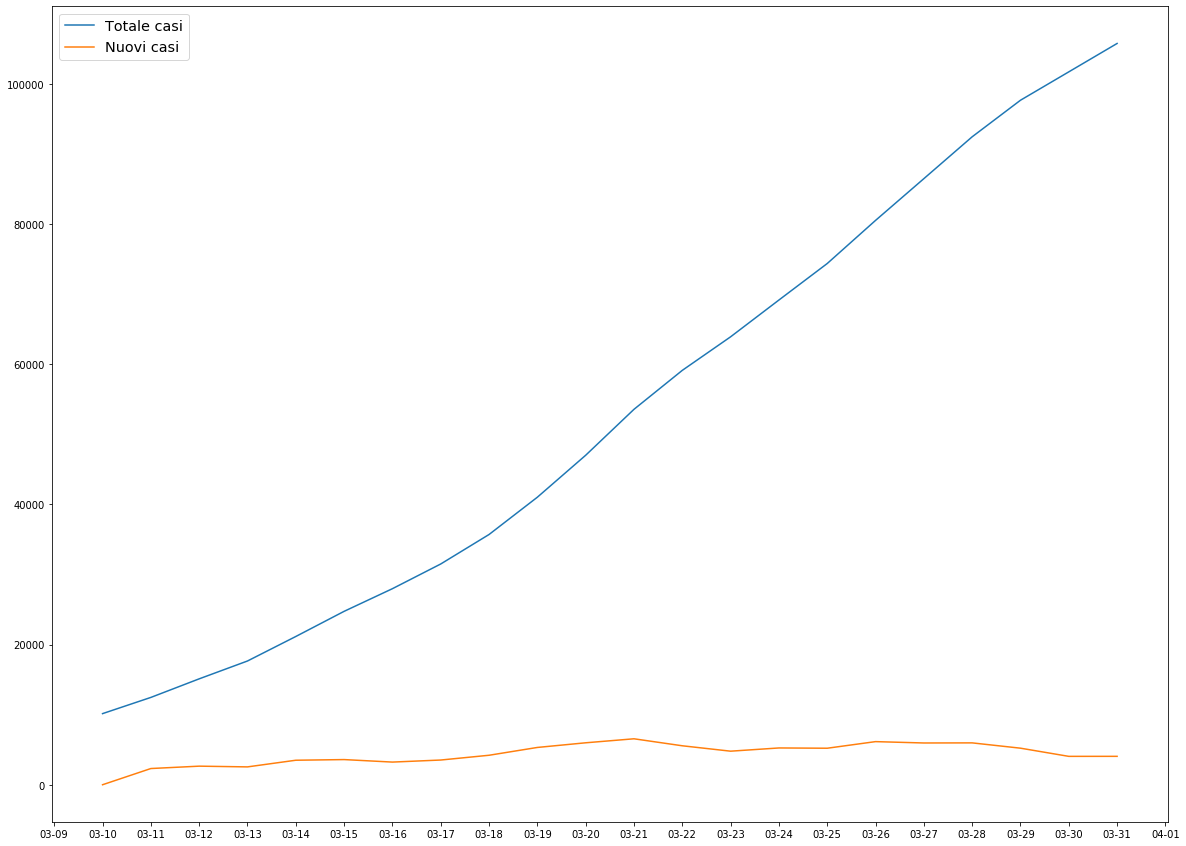

In [15]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

### Totale nuovi casi - ENG: New cases

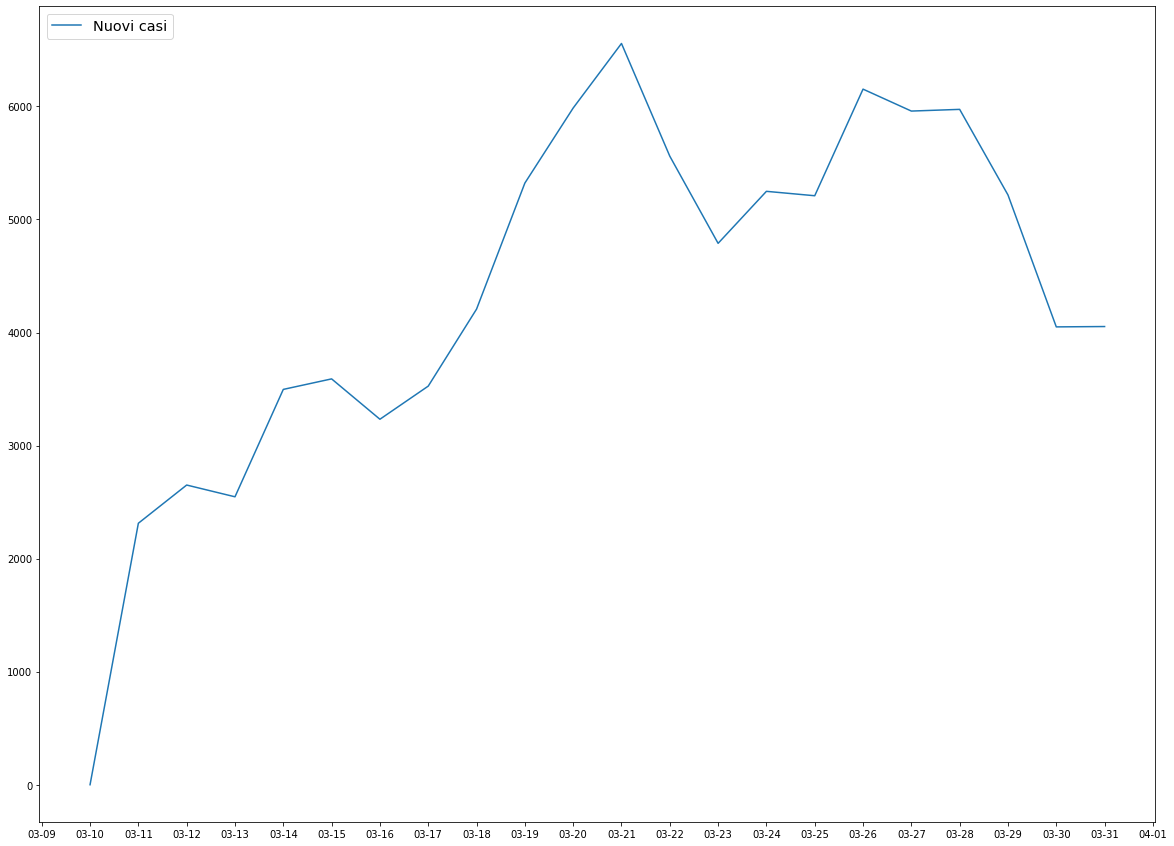

In [16]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

### Rapporto casi tamponi - ENG: Cases Tests Ratio

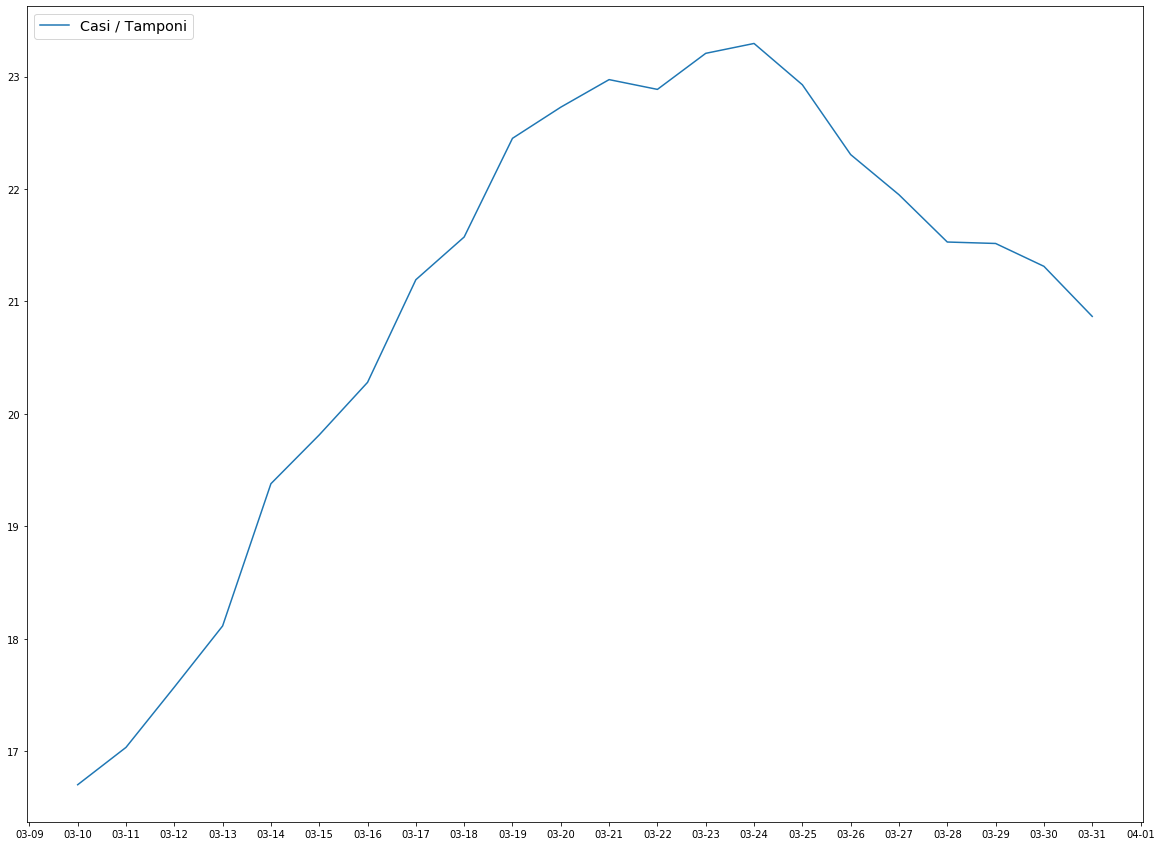

In [17]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
tamponi = df["tamponi"].values
rapporto_casi_tamponi = totale_casi / tamponi * 100

plt.plot(data, rapporto_casi_tamponi, label="Casi / Tamponi")

plt.legend(loc="upper left")
plt.show()

### Rapporto nuovi casi e nuovi tamponi - ENG: New Cases New Tests Ratio

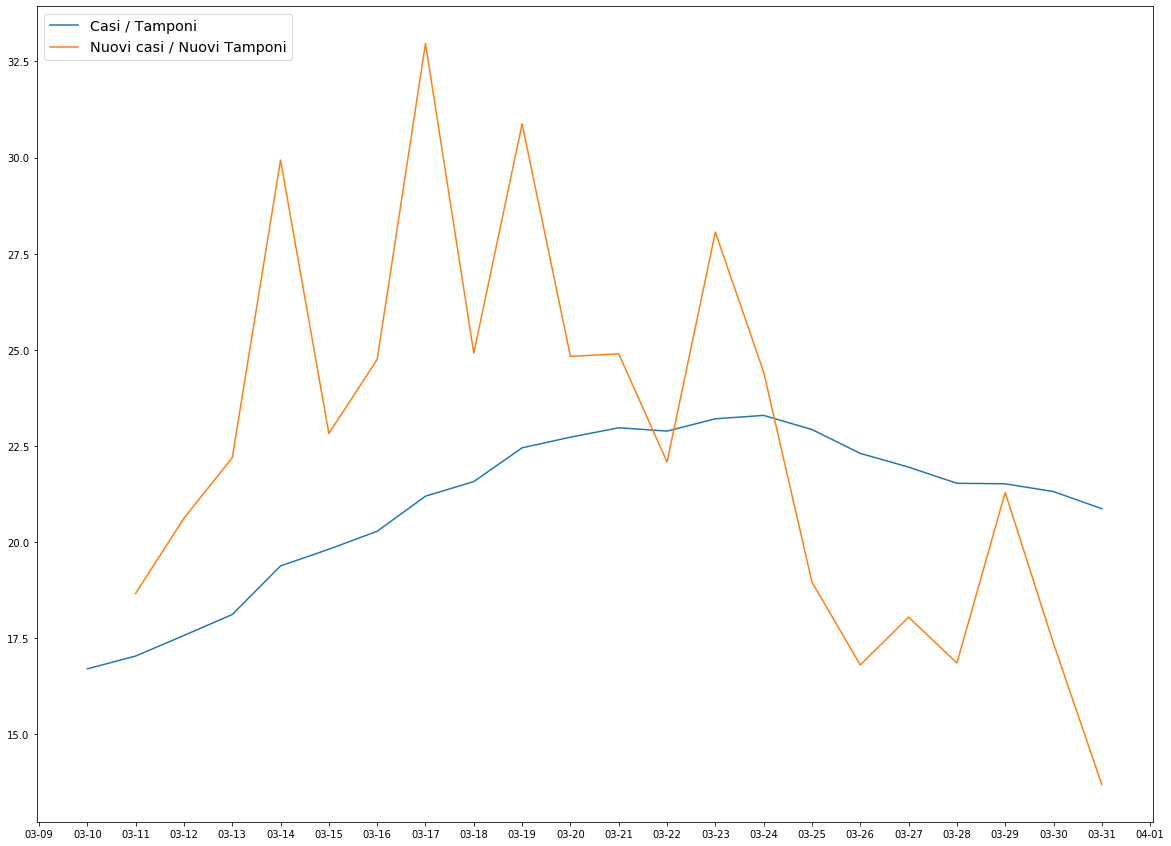

In [18]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
tamponi = df["tamponi"].values

rapporto_casi_tamponi = totale_casi / tamponi * 100

nuovi_casi = totale_casi - np.roll(totale_casi, 1)
nuovi_casi = nuovi_casi[1:]
nuovi_tamponi = tamponi - np.roll(tamponi, 1)
nuovi_tamponi = nuovi_tamponi[1:]
rapporto_nuovi_casi_tamponi = nuovi_casi / nuovi_tamponi * 100

plt.plot(data, rapporto_casi_tamponi, label="Casi / Tamponi")
plt.plot(data[1:], rapporto_nuovi_casi_tamponi, label="Nuovi casi / Nuovi Tamponi")

plt.legend(loc="upper left")
plt.show()

# Cubic curve fit per Casi Totali - ENG: Cubic curve fit for Cases

In [19]:
def cubic_func(x, a, b, c, d):
    return a*np.power(x, 3) + b*np.power(x, 2) + c*x + d

Parameters: [-7.79054157e+00  3.25704008e+02  1.14292267e+03  1.10348628e+04]


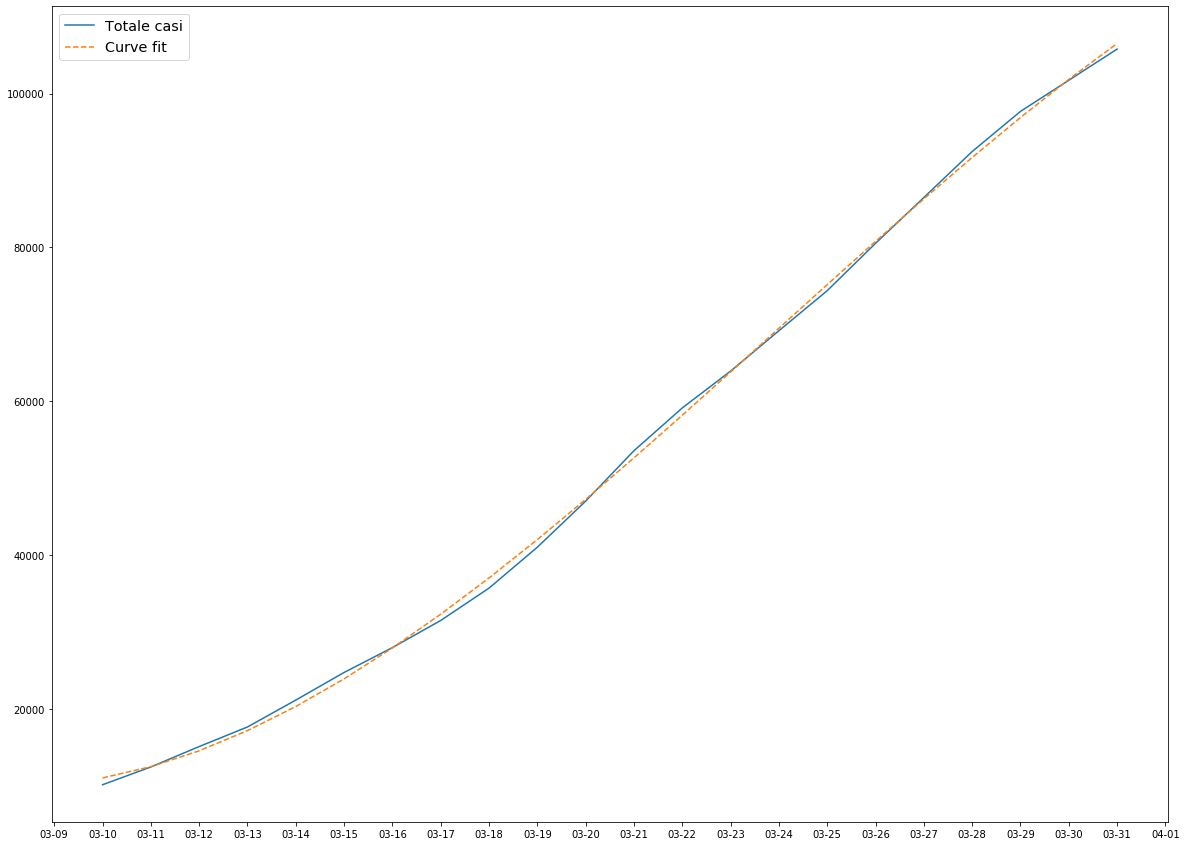

In [20]:
xdata, popt_cub, pcov_cub = fit_data(totale_casi, data, cubic_func)

## Errore parametri - ENG: Parameters Error

In [21]:
np.sqrt(np.diag(pcov_cub)).sum()

815.9201918760475

## Predizione giorno seguente - ENG: Next Day Prediction

In [22]:
cubic_pred = cubic_func(np.array([xdata[-1]+1]), *popt_cub).astype(int)

In [23]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], cubic_pred[0],
                                                                           cubic_pred[0] - totale_casi[-1]))

Valore odierno: 105792 | Giorno seguente: 110866 | Incremento 5074


# Quadratic curve fit per Casi Totali - ENG: Quadratic curve fit for Cases

In [24]:
def quadratic_func(x, a, b, c):
    return a*np.power(x, 2) + b*x + c

Parameters: [  80.30194878 3156.77765216 7926.43681611]


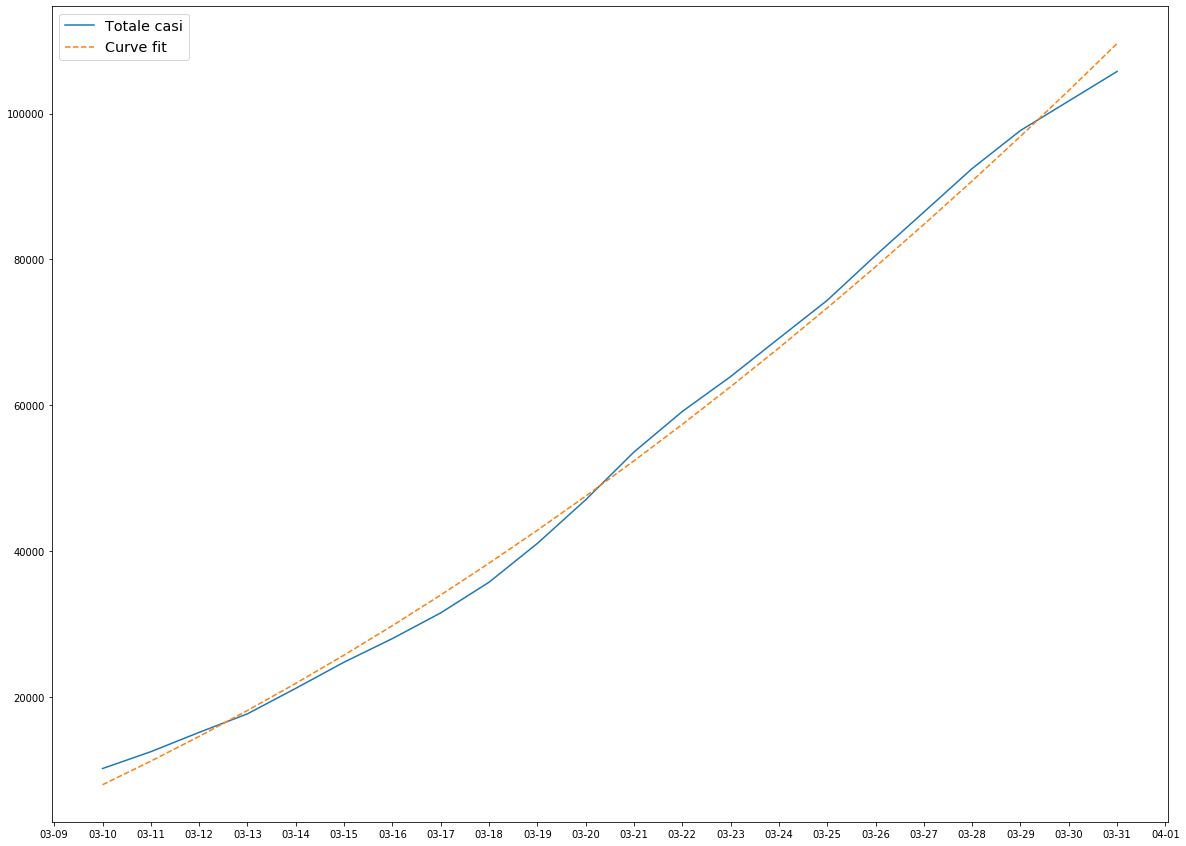

In [25]:
xdata, popt_sqr, pcov_sqr = fit_data(totale_casi, data, quadratic_func)

## Errore parametri - ENG: Parameters Error

In [26]:
np.sqrt(np.diag(pcov_sqr)).sum()

1312.6110974472706

## Predizione giorno seguente - ENG: Next Day Prediction

In [27]:
quadratic_pred = quadratic_func(np.array([xdata[-1]+1]), *popt_sqr).astype(int)

In [28]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], quadratic_pred[0],
                                                                           quadratic_pred[0] - totale_casi[-1]))

Valore odierno: 105792 | Giorno seguente: 116241 | Incremento 10449


# Linear fit per Casi Totali - ENG: Linear fit for Cases

In [29]:
def linear_func(x, a, b):
    return a*x + b

Parameters: [4843.11859389 2305.30015597]


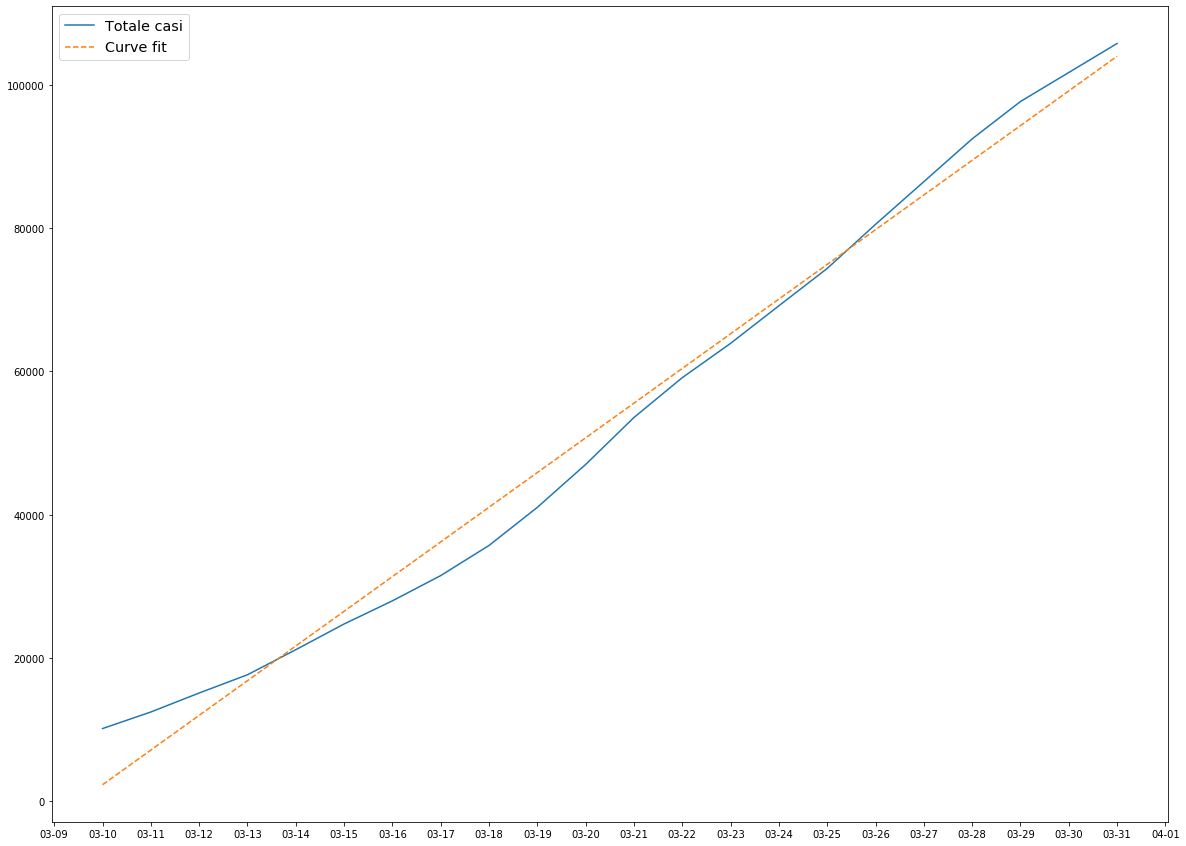

In [30]:
xdata, popt_lin, pcov_lin = fit_data(totale_casi, data, linear_func)

## Errore parametri - ENG: Parameters Error

In [31]:
np.sqrt(np.diag(pcov_lin)).sum()

1562.9134695484952

## Predizione giorno seguente - ENG: Next Day Prediction

In [32]:
lin_pred = linear_func(np.array([xdata[-1]+1]), *popt_lin).astype(int)

In [33]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], lin_pred[0],
                                                                           lin_pred[0] - totale_casi[-1]))

Valore odierno: 105792 | Giorno seguente: 108853 | Incremento 3061


# Combinazione modelli - ENG: Model Ensemble

## Modello Linear + Cubico - ENG: Linear + Cubic Model

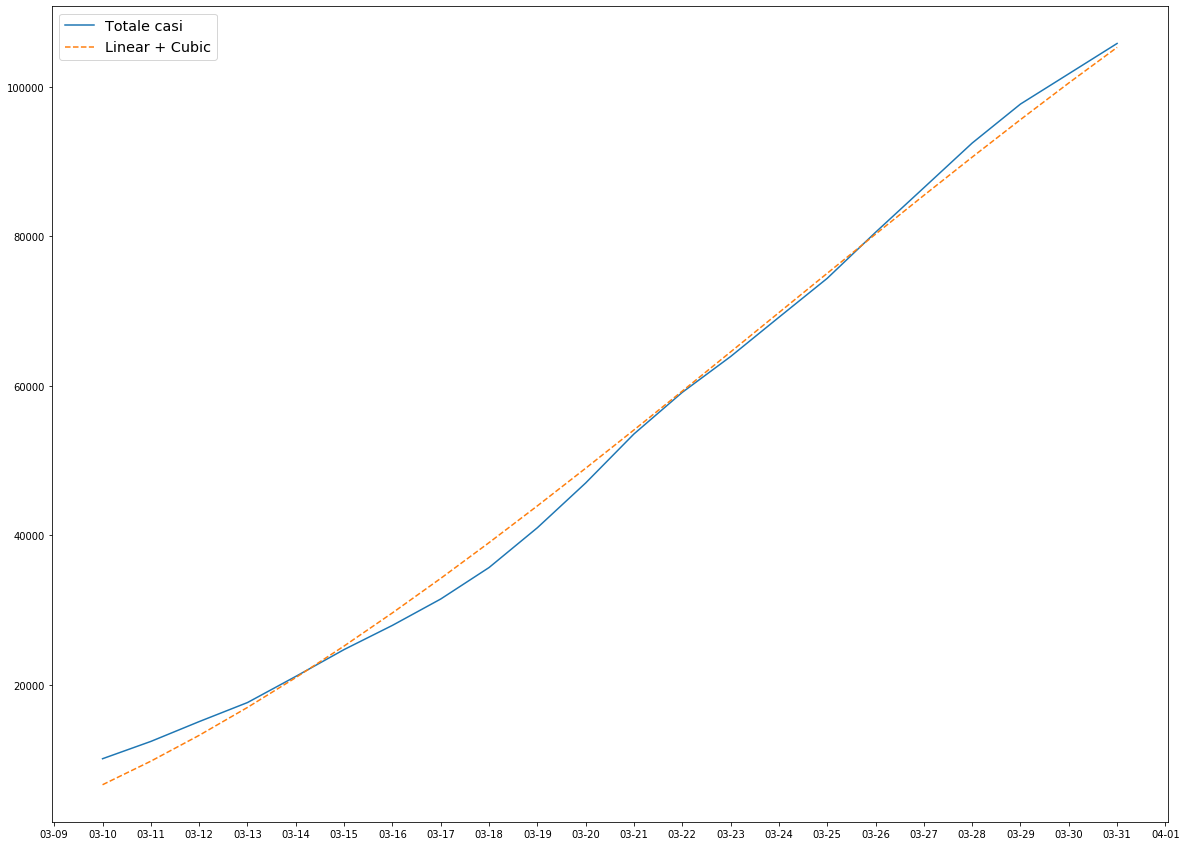

In [34]:
ensemble = (linear_func(xdata, *popt_lin) + cubic_func(xdata, *popt_cub))/2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, ensemble, "--", label="Linear + Cubic")

plt.legend(loc="upper left")
plt.show()

## Predizione giorno seguente - ENG: Next Day Prediction

In [35]:
ensemble_pred = int((lin_pred + cubic_pred)/2)

In [36]:
print("Valore odierno: {0} | Giorno seguente: {1} | Incremento {2}".format(totale_casi[-1], ensemble_pred,
                                                                           ensemble_pred - totale_casi[-1]))

Valore odierno: 105792 | Giorno seguente: 109859 | Incremento 4067


## Predizione a 7 giorni - ENG: 7 days prediction

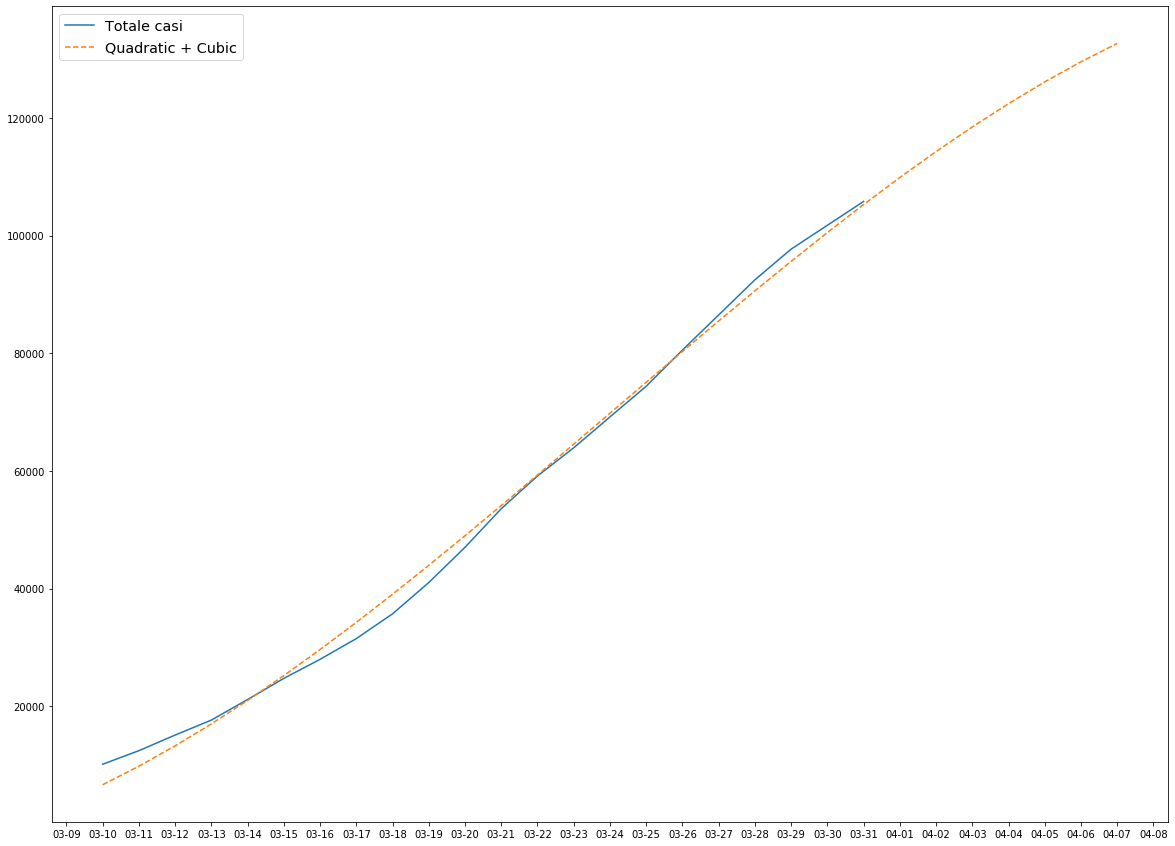

In [37]:
x = np.arange(xdata[0], len(xdata)+7, 1)
lin_pred = linear_func(x, *popt_lin).astype(int)
cubic_pred = cubic_func(x, *popt_cub).astype(int)
ensemble_pred = (lin_pred + cubic_pred) / 2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
data_range = np.arange(data[0], data[-1] + np.timedelta64("8", "D"), np.timedelta64("1", "D"))
plt.plot(data_range, ensemble_pred, "--", label="Quadratic + Cubic")

plt.legend(loc="upper left")
plt.show()